In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir_4_5_5 ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v4.5.5_linear_scale-up_etc/ciff_sam/2021_11_23_17_59_09/count_data/'
output_dir_4_5_6 ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v4.5.6_no_x_factor/ciff_sam/2021_11_29_14_01_14/count_data/'

In [4]:
def calculate_wasting_incidence_reduction(output_dir, groupby_cols):
    data = pd.read_csv(output_dir + 'wasting_transition_count.csv')
    data = data.loc[data.measure.isin(['mild_child_wasting_to_moderate_acute_malnutrition_event_count',
                                      'moderate_acute_malnutrition_to_severe_acute_malnutrition_event_count'])]
    data = data.groupby(groupby_cols).sum()['value'].reset_index()
    baseline = data.loc[data.scenario=='baseline'].set_index([c for c in groupby_cols if c != 'scenario']).drop(columns='scenario')
    pct_reduction = (baseline - data.set_index(groupby_cols)) / baseline * 100
    pct_reduction = pct_reduction.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
    return pct_reduction

In [7]:
incidence_reduction_4_5_5 = calculate_wasting_incidence_reduction(output_dir_4_5_5, ['input_draw','measure','scenario'])
incidence_reduction_4_5_5

value  \
                                                                     count   
measure                                            scenario                  
mild_child_wasting_to_moderate_acute_malnutriti... baseline           12.0   
                                                   sqlns              12.0   
                                                   wasting_treatment  12.0   
moderate_acute_malnutrition_to_severe_acute_mal... baseline           12.0   
                                                   sqlns              12.0   
                                                   wasting_treatment  12.0   

                                                                                 \
                                                                           mean   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               6.337424   
                                                   wasting_treatment  -1.280051   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              13.568204   
                                                   wasting_treatment   8.045906   

                                                                                \
                                                                           std   
measure                                            scenario                      
mild_child_wasting_to_moderate_acute_malnutriti... baseline           0.000000   
                                                   sqlns              1.373831   
                                                   wasting_treatment  0.153655   
moderate_acute_malnutrition_to_severe_acute_mal... baseline           0.000000   
                                                   sqlns              1.052388   
                                                   wasting_treatment  0.899907   

                                                                                 \
                                                                            min   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               3.884633   
                                                   wasting_treatment  -1.548843   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              11.708748   
                                                   wasting_treatment   6.820413   

                                                                                 \
                                                                           2.5%   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               4.081170   
                                                   wasting_treatment  -1.530399   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              11.863913   
                                                   wasting_treatment   6.860177   

                                                                                 \
                                                                            50%   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   

In [8]:
incidence_reduction_4_5_6 = calculate_wasting_incidence_reduction(output_dir_4_5_6, ['input_draw','measure','scenario'])
incidence_reduction_4_5_6

value  \
                                                                     count   
measure                                            scenario                  
mild_child_wasting_to_moderate_acute_malnutriti... baseline           12.0   
                                                   sqlns              12.0   
                                                   wasting_treatment  12.0   
moderate_acute_malnutrition_to_severe_acute_mal... baseline           12.0   
                                                   sqlns              12.0   
                                                   wasting_treatment  12.0   

                                                                                 \
                                                                           mean   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               6.745345   
                                                   wasting_treatment  -0.976866   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              14.007045   
                                                   wasting_treatment   8.274942   

                                                                                \
                                                                           std   
measure                                            scenario                      
mild_child_wasting_to_moderate_acute_malnutriti... baseline           0.000000   
                                                   sqlns              1.368884   
                                                   wasting_treatment  0.094030   
moderate_acute_malnutrition_to_severe_acute_mal... baseline           0.000000   
                                                   sqlns              1.039553   
                                                   wasting_treatment  0.768683   

                                                                                 \
                                                                            min   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               4.172594   
                                                   wasting_treatment  -1.150522   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              12.403186   
                                                   wasting_treatment   7.087488   

                                                                                 \
                                                                           2.5%   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   sqlns               4.441174   
                                                   wasting_treatment  -1.130534   
moderate_acute_malnutrition_to_severe_acute_mal... baseline            0.000000   
                                                   sqlns              12.429741   
                                                   wasting_treatment   7.162738   

                                                                                 \
                                                                            50%   
measure                                            scenario                       
mild_child_wasting_to_moderate_acute_malnutriti... baseline            0.000000   
                                                   

In [16]:
inc_reduction_4_5_5 = calculate_wasting_incidence_reduction(output_dir_4_5_5, ['input_draw','measure','scenario'])
inc_reduction_4_5_5['run'] = '4.5.5'
inc_reduction_4_5_6 = calculate_wasting_incidence_reduction(output_dir_4_5_6, ['input_draw','measure','scenario'])
inc_reduction_4_5_6['run'] = '4.5.6'
inc_reduction_comparison = (pd.concat([inc_reduction_4_5_5, inc_reduction_4_5_6])
                             .reset_index().set_index(['measure','scenario','run'])
                             .sort_index())
inc_reduction_comparison

value  \
                                                                           count   
measure                                            scenario          run           
mild_child_wasting_to_moderate_acute_malnutriti... baseline          4.5.5  12.0   
                                                                     4.5.6  12.0   
                                                   sqlns             4.5.5  12.0   
                                                                     4.5.6  12.0   
                                                   wasting_treatment 4.5.5  12.0   
                                                                     4.5.6  12.0   
moderate_acute_malnutrition_to_severe_acute_mal... baseline          4.5.5  12.0   
                                                                     4.5.6  12.0   
                                                   sqlns             4.5.5  12.0   
                                                                     4.5.6  12.0   
                                                   wasting_treatment 4.5.5  12.0   
                                                                     4.5.6  12.0   

                                                                                       \
                                                                                 mean   
measure                                            scenario          run                
mild_child_wasting_to_moderate_acute_malnutriti... baseline          4.5.5   0.000000   
                                                                     4.5.6   0.000000   
                                                   sqlns             4.5.5   6.337424   
                                                                     4.5.6   6.745345   
                                                   wasting_treatment 4.5.5  -1.280051   
                                                                     4.5.6  -0.976866   
moderate_acute_malnutrition_to_severe_acute_mal... baseline          4.5.5   0.000000   
                                                                     4.5.6   0.000000   
                                                   sqlns             4.5.5  13.568204   
                                                                     4.5.6  14.007045   
                                                   wasting_treatment 4.5.5   8.045906   
                                                                     4.5.6   8.274942   

                                                                                      \
                                                                                 std   
measure                                            scenario          run               
mild_child_wasting_to_moderate_acute_malnutriti... baseline          4.5.5  0.000000   
                                                                     4.5.6  0.000000   
                                                   sqlns             4.5.5  1.373831   
                                                                     4.5.6  1.368884   
                                                   wasting_treatment 4.5.5  0.153655   
                                                                     4.5.6  0.094030   
moderate_acute_malnutrition_to_severe_acute_mal... baseline          4.5.5  0.000000   
                                                                     4.5.6  0.000000   
                                                   sqlns             4.5.5  1.052388   
                                                                     4.5.6  1.039553   
                                                   wasting_treatment 4.5.5  0.899907   
                                                                     4.5.6  0.768683   

                                                                                       \
                                                                    

In [49]:
def calculate_wasting_prevalence_reduction(output_dir, groupby_cols):
    data = pd.read_csv(output_dir + 'wasting_state_person_time.csv')
    wasted = data.loc[data.cause.str.contains('acute_malnutrition')]
    wasted['cause'] = 'wasted'
    data = pd.concat([data,wasted])
    data = data.groupby(groupby_cols).sum()['value'].reset_index()
    baseline = data.loc[data.scenario=='baseline'].set_index([c for c in groupby_cols if c != 'scenario']).drop(columns='scenario')
    pct_reduction = (baseline - data.set_index(groupby_cols)) / baseline * 100
    pct_reduction = pct_reduction.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
    return pct_reduction

In [51]:
prev_reduction_4_5_5 = calculate_wasting_prevalence_reduction(output_dir_4_5_5, ['input_draw','cause','scenario'])
prev_reduction_4_5_5['run'] = '4.5.5'
prev_reduction_4_5_6 = calculate_wasting_prevalence_reduction(output_dir_4_5_6, ['input_draw','cause','scenario'])
prev_reduction_4_5_6['run'] = '4.5.6'
prev_reduction_comparison = (pd.concat([prev_reduction_4_5_5, prev_reduction_4_5_6])
                             .reset_index().set_index(['cause','scenario','run'])
                             .sort_index())
prev_reduction_comparison

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


value             \
                                                     count       mean   
cause                        scenario          run                      
mild_child_wasting           baseline          4.5.5  12.0   0.000000   
                                               4.5.6  12.0   0.000000   
                             sqlns             4.5.5  12.0  -1.418253   
                                               4.5.6  12.0  -1.430588   
                             wasting_treatment 4.5.5  12.0  -0.848537   
                                               4.5.6  12.0  -0.853052   
moderate_acute_malnutrition  baseline          4.5.5  12.0   0.000000   
                                               4.5.6  12.0   0.000000   
                             sqlns             4.5.5  12.0  12.366761   
                                               4.5.6  12.0  12.598520   
                             wasting_treatment 4.5.5  12.0   7.278165   
                                               4.5.6  12.0   7.420792   
severe_acute_malnutrition    baseline          4.5.5  12.0   0.000000   
                                               4.5.6  12.0   0.000000   
                             sqlns             4.5.5  12.0  11.213940   
                                               4.5.6  12.0  11.009220   
                             wasting_treatment 4.5.5  12.0   7.110077   
                                               4.5.6  12.0   6.937987   
susceptible_to_child_wasting baseline          4.5.5  12.0   0.000000   
                                               4.5.6  12.0   0.000000   
                             sqlns             4.5.5  12.0  -1.208059   
                                               4.5.6  12.0  -1.211203   
                             wasting_treatment 4.5.5  12.0  -0.720932   
                                               4.5.6  12.0  -0.720285   
wasted                       baseline          4.5.5  12.0   0.000000   
                                               4.5.6  12.0   0.000000   
                             sqlns             4.5.5  12.0  12.110332   
                                               4.5.6  12.0  12.293498   
                             wasting_treatment 4.5.5  12.0   7.243327   
                                               4.5.6  12.0   7.330042   

                                                                           \
                                                           std        min   
cause                        scenario          run                          
mild_child_wasting           baseline          4.5.5  0.000000   0.000000   
                                               4.5.6  0.000000   0.000000   
                             sqlns             4.5.5  0.110801  -1.556856   
                                               4.5.6  0.109127  -1.567781   
                             wasting_treatment 4.5.5  0.092957  -1.039745   
                                               4.5.6  0.078881  -1.015896   
moderate_acute_malnutrition  baseline          4.5.5  0.000000   0.000000   
                                               4.5.6  0.000000   0.000000   
                             sqlns             4.5.5  0.907047  10.947816   
                                               4.5.6  0.865691  11.188919   
                             wasting_treatment 4.5.5  0.703857   6.213713   
                                               4.5.6  0.642981   6.359534   
severe_acute_malnutrition    baseline          4.5.5  0.000000   0.000000   
                                               4.5.6  0.000000   0.000000   
                             sqlns             4.5.5  1.023474  10.123605   
                                               4.5.6  0.940342  10.028726   
                             wasting_treatment 4.5.5  1.142290   4.983014   
                                               4.5.6  1.108937   4.732776   
susceptible_to_child_wasti

In [17]:
groupby_cols = ['scenario','input_draw','cause']

def calculate_child_growth_exposure_prevalence(output_dir, risk, groupby_cols, six_to_59_months_and_2023_plus=True):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    if six_to_59_months_and_2023_plus==True:
        state_pt = state_pt.loc[state_pt.year>=2023].loc[state_pt.age.isin(['6-11_months',
           '12_to_23_months', '2_to_4'])]
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    elif risk=='stunting':
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [21]:
p_4_5_5 = calculate_child_growth_exposure_prevalence(output_dir_4_5_5, 'wasting', groupby_cols, True).reset_index()
p_4_5_5['order'] = np.where(p_4_5_5.scenario=='baseline', 0, np.where(p_4_5_5.scenario=='wasting_treatment', 1, 2))
p_4_5_5['value'] = p_4_5_5['value'] * 100
p_4_5_5 = p_4_5_5.sort_values(by='order')
p_4_5_6 = calculate_child_growth_exposure_prevalence(output_dir_4_5_6, 'wasting', groupby_cols, True).reset_index()
p_4_5_6['order'] = np.where(p_4_5_6.scenario=='baseline', 0, np.where(p_4_5_6.scenario=='wasting_treatment', 1, 2))
p_4_5_6['value'] = p_4_5_6['value'] * 100
p_4_5_6 = p_4_5_6.sort_values(by='order')
p_4_5_6

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


scenario                         cause   value             \
                                                      count       mean   
0            baseline            mild_child_wasting  1200.0  20.617206   
1            baseline   moderate_acute_malnutrition  1200.0   7.276562   
2            baseline     severe_acute_malnutrition  1200.0   1.627597   
3            baseline  susceptible_to_child_wasting  1200.0  70.478635   
4            baseline                        wasted  1200.0   8.904159   
10  wasting_treatment            mild_child_wasting  1200.0  20.858961   
11  wasting_treatment   moderate_acute_malnutrition  1200.0   6.511557   
12  wasting_treatment     severe_acute_malnutrition  1200.0   1.456182   
13  wasting_treatment  susceptible_to_child_wasting  1200.0  71.173300   
14  wasting_treatment                        wasted  1200.0   7.967739   
5               sqlns            mild_child_wasting  1200.0  21.022074   
6               sqlns   moderate_acute_malnutrition  1200.0   5.977389   
7               sqlns     severe_acute_malnutrition  1200.0   1.355784   
8               sqlns  susceptible_to_child_wasting  1200.0  71.644754   
9               sqlns                        wasted  1200.0   7.333173   

                                                                    order  
         std        min       2.5%        50%      97.5%        max        
0   0.109079  20.500172  20.501210  20.616195  20.847689  20.904477     0  
1   0.092254   7.134229   7.149340   7.272072   7.426795   7.428332     0  
2   0.072730   1.495265   1.507733   1.621598   1.752282   1.781241     0  
3   0.199874  69.993013  70.076292  70.511046  70.752861  70.766292     0  
4   0.159740   8.629495   8.663060   8.880205   9.176078   9.203984     0  
10  0.107372  20.744154  20.750827  20.856869  21.077321  21.134264     1  
11  0.117105   6.296250   6.322813   6.525606   6.695052   6.719410     1  
12  0.056597   1.339594   1.350177   1.462390   1.526961   1.531113     1  
13  0.207128  70.643105  70.760400  71.181937  71.478748  71.506269     1  
14  0.164765   7.635845   7.694642   7.981271   8.205944   8.222631     1  
5   0.106220  20.924419  20.926794  21.006925  21.255745  21.325311     2  
6   0.112333   5.779286   5.788970   6.009564   6.098974   6.104761     2  
7   0.050235   1.244532   1.260066   1.361577   1.429674   1.438476     2  
8   0.195993  71.206206  71.295894  71.626711  71.952536  71.959586     2  
9   0.147676   7.023818   7.053841   7.354539   7.522679   7.543236     2

Text(0, 0.5, 'Percent')

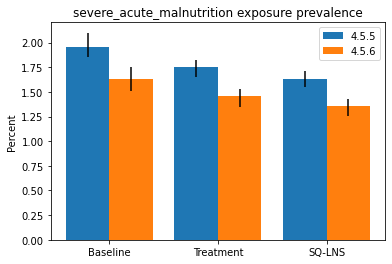

In [35]:
sev = 'severe_acute_malnutrition'

x_vals = [0, 1, 2]
barwidth=0.4
p_5 = p_4_5_5.loc[p_4_5_5.cause==sev]
p_6 = p_4_5_6.loc[p_4_5_5.cause==sev]
plt.bar(x_vals,p_5['value','mean'],
       width=barwidth, yerr=[p_5['value','mean'] - p_5['value','2.5%'], 
                                              p_5['value','97.5%'] - p_5['value','mean']],
       label='4.5.5')
plt.bar([r + barwidth for r in x_vals],p_6['value','mean'],
       width=barwidth, yerr=[p_6['value','mean'] - p_6['value','2.5%'], 
                                              p_6['value','97.5%'] - p_6['value','mean']],
       label='4.5.6')
plt.legend()
plt.title(f'{sev} exposure prevalence')
plt.xticks([r + barwidth/2 for r in x_vals], ['Baseline','Treatment','SQ-LNS'])
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

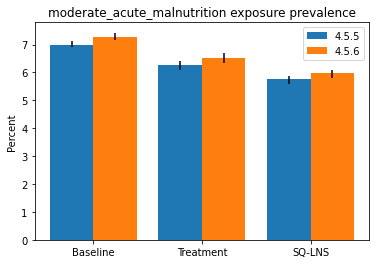

In [36]:
sev = 'moderate_acute_malnutrition'

x_vals = [0, 1, 2]
barwidth=0.4
p_5 = p_4_5_5.loc[p_4_5_5.cause==sev]
p_6 = p_4_5_6.loc[p_4_5_5.cause==sev]
plt.bar(x_vals,p_5['value','mean'],
       width=barwidth, yerr=[p_5['value','mean'] - p_5['value','2.5%'], 
                                              p_5['value','97.5%'] - p_5['value','mean']],
       label='4.5.5')
plt.bar([r + barwidth for r in x_vals],p_6['value','mean'],
       width=barwidth, yerr=[p_6['value','mean'] - p_6['value','2.5%'], 
                                              p_6['value','97.5%'] - p_6['value','mean']],
       label='4.5.6')
plt.legend()
plt.title(f'{sev} exposure prevalence')
plt.xticks([r + barwidth/2 for r in x_vals], ['Baseline','Treatment','SQ-LNS'])
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

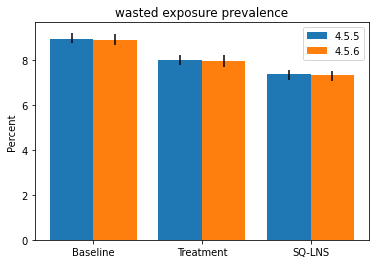

In [37]:
sev = 'wasted'

x_vals = [0, 1, 2]
barwidth=0.4
p_5 = p_4_5_5.loc[p_4_5_5.cause==sev]
p_6 = p_4_5_6.loc[p_4_5_5.cause==sev]
plt.bar(x_vals,p_5['value','mean'],
       width=barwidth, yerr=[p_5['value','mean'] - p_5['value','2.5%'], 
                                              p_5['value','97.5%'] - p_5['value','mean']],
       label='4.5.5')
plt.bar([r + barwidth for r in x_vals],p_6['value','mean'],
       width=barwidth, yerr=[p_6['value','mean'] - p_6['value','2.5%'], 
                                              p_6['value','97.5%'] - p_6['value','mean']],
       label='4.5.6')
plt.legend()
plt.title(f'{sev} exposure prevalence')
plt.xticks([r + barwidth/2 for r in x_vals], ['Baseline','Treatment','SQ-LNS'])
plt.ylabel('Percent')